In [19]:
import dataset as dataset
#import utils.helpers as helpers
import plot_lib as plot_lib
import implementations

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [6]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

def positive_negative_to_binary(Y):
    Y[Y == -1.0] = 0.0
    return Y

def binary_to_positive_negative(Y):
    Y[Y == 0.0] = -1.0
    return Y

# Data handling

## Loading the Data

In [7]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

Loading data ..
Load done ..


## Pre-processing

### Preprocessing training data
- deleting certain unwanted columns/features
- clean nan values
- add bias to training data
- split training data using split ratio
    - training X & Y
    - validation X & Y

In [8]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.90

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train, 10)

# adding bias to X_train data
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
implementations.set_validation_dataset(X_validation, Y_validation)

print("Preprocess done ..")

Preprocessing train data ..
Preprocess done ..


### Preprocessing test data
- load test data
- set -1 values to zero
- deleting certain unwanted columns/features
- add bias to test data

In [9]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test, 10)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

Preprocessing test data ..
Preprocess done ..


# Hyperparameter testing

## Linear regression using gradient descent
### > hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.17133, Testing RMSE=0.16913
2 proportion=0.9, gamma=0.000, Training RMSE=0.17118, Testing RMSE=0.16893
3 proportion=0.9, gamma=0.000, Training RMSE=0.17093, Testing RMSE=0.16862
4 proportion=0.9, gamma=0.000, Training RMSE=0.17052, Testing RMSE=0.16812
5 proportion=0.9, gamma=0.000, Training RMSE=0.16988, Testing RMSE=0.16734
6 proportion=0.9, gamma=0.000, Training RMSE=0.16887, Testing RMSE=0.16612
7 proportion=0.9, gamma=0.000, Training RMSE=0.16734, Testing RMSE=0.16428
8 proportion=0.9, gamma=0.000, Training RMSE=0.16510, Testing RMSE=0.16166
9 proportion=0.9, gamma=0.001, Training RMSE=0.16199, Testing RMSE=0.15809
10 proportion=0.9, gamma=0.001, Training RMSE=0.15790, Testing RMSE=0.15351
11 proportion=0.9, gamma=0.001, Training RMSE=0.15273, Testing RMSE=0.14776
12 proportion=0.9, gamma=0.002, Training RMSE=0.14617, Testing RMSE=0.14048
13 proportion=0.9, gamma=0.004, Training RMSE=0.13774, Testing RMSE=0.13130
14 proportion=0.9, ga

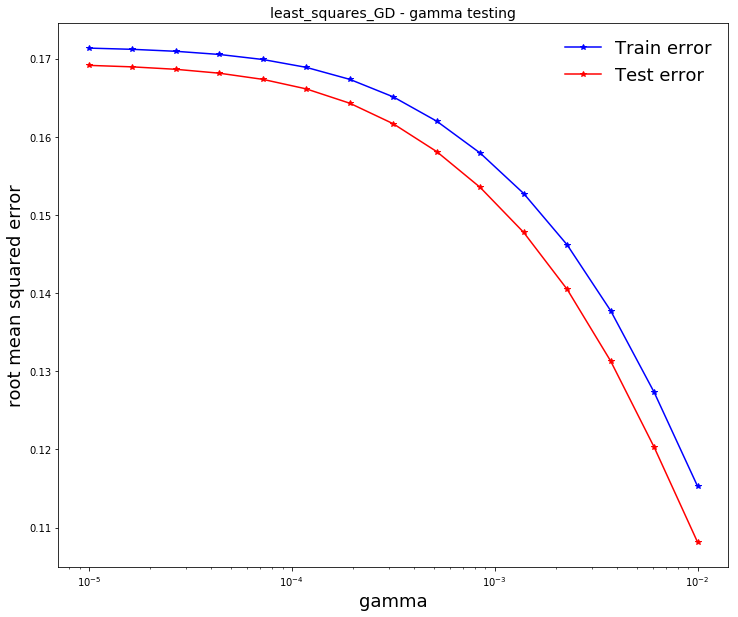

In [20]:
# seed for splitting
seed = 1234
# seed for splitting
split_ratio = ratio_for_splitting
# range of gamma to plot (from, to, iterations)
gamma_range_gd = np.logspace(-5, -2, 15)
# iterations per gamma
iteration_gd = 10
# params for LS-GD
params = {
    'gamma': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_gd ,
}

plot_lib.hyperparameter_testing(Y_train, X_train, split_ratio, seed, gamma_range_gd, "least_squares_GD", params, "gamma")


## Linear regression using stochastic gradient descent
### > hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.17107, Testing RMSE=0.17211
2 proportion=0.9, gamma=0.000, Training RMSE=0.17107, Testing RMSE=0.17210
3 proportion=0.9, gamma=0.000, Training RMSE=0.17106, Testing RMSE=0.17210
4 proportion=0.9, gamma=0.000, Training RMSE=0.17105, Testing RMSE=0.17208
5 proportion=0.9, gamma=0.000, Training RMSE=0.17101, Testing RMSE=0.17201
6 proportion=0.9, gamma=0.000, Training RMSE=0.17088, Testing RMSE=0.17179
7 proportion=0.9, gamma=0.000, Training RMSE=0.17060, Testing RMSE=0.17157
8 proportion=0.9, gamma=0.000, Training RMSE=0.17010, Testing RMSE=0.17056
9 proportion=0.9, gamma=0.000, Training RMSE=0.16884, Testing RMSE=0.16893
10 proportion=0.9, gamma=0.000, Training RMSE=0.16712, Testing RMSE=0.16683
11 proportion=0.9, gamma=0.000, Training RMSE=0.16464, Testing RMSE=0.16179
12 proportion=0.9, gamma=0.000, Training RMSE=0.15989, Testing RMSE=0.15787
13 proportion=0.9, gamma=0.001, Training RMSE=0.15596, Testing RMSE=0.15538
14 proportion=0.9, ga

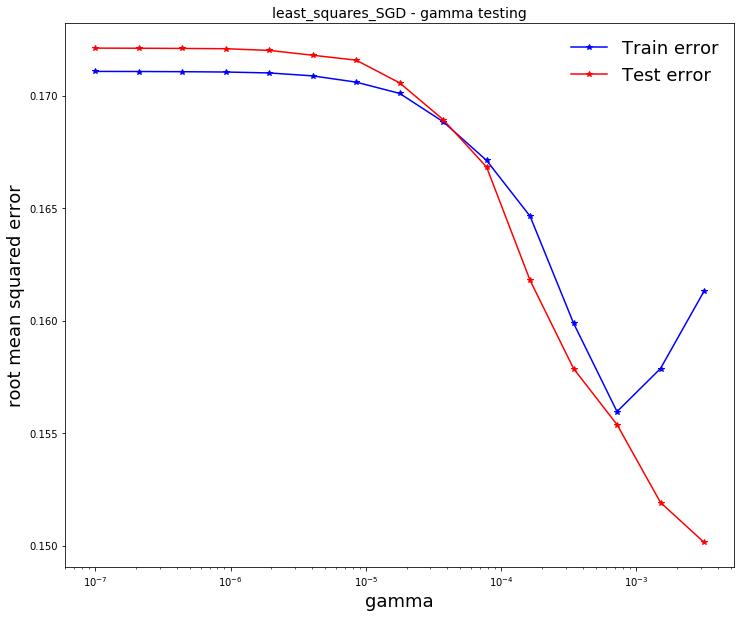

In [22]:
gamma_range_sgd = np.logspace(-7, -2.5, 15)
# iterations per gamma
iteration_sgd = 10
# params for LS-SGD
params = {
    'initial_w': np.zeros(X_train.shape[1]),
    'batch_size': 100000,
    'max_iters': iteration_sgd,
    'gamma': 0.00005,
}

plot_lib.hyperparameter_testing(Y_train, X_train, split_ratio, seed, gamma_range_sgd, "least_squares_SGD", params, "gamma")


## Least squares regression using normal equations


In [ ]:
### 

## Ridge regression using normal equations
### > hyperparameter lambda testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.06963, Testing RMSE=0.06773
2 proportion=0.9, gamma=0.000, Training RMSE=0.06970, Testing RMSE=0.06793
3 proportion=0.9, gamma=0.000, Training RMSE=0.06998, Testing RMSE=0.06830
4 proportion=0.9, gamma=0.000, Training RMSE=0.07023, Testing RMSE=0.06867
5 proportion=0.9, gamma=0.000, Training RMSE=0.07039, Testing RMSE=0.06914
6 proportion=0.9, gamma=0.000, Training RMSE=0.07060, Testing RMSE=0.06957
7 proportion=0.9, gamma=0.000, Training RMSE=0.07096, Testing RMSE=0.06984
8 proportion=0.9, gamma=0.000, Training RMSE=0.07136, Testing RMSE=0.07020
9 proportion=0.9, gamma=0.000, Training RMSE=0.07187, Testing RMSE=0.07117
10 proportion=0.9, gamma=0.000, Training RMSE=0.07307, Testing RMSE=0.07203
11 proportion=0.9, gamma=0.000, Training RMSE=0.07404, Testing RMSE=0.07321
12 proportion=0.9, gamma=0.000, Training RMSE=0.07513, Testing RMSE=0.07445
13 proportion=0.9, gamma=0.000, Training RMSE=0.07606, Testing RMSE=0.07535
14 proportion=0.9, ga

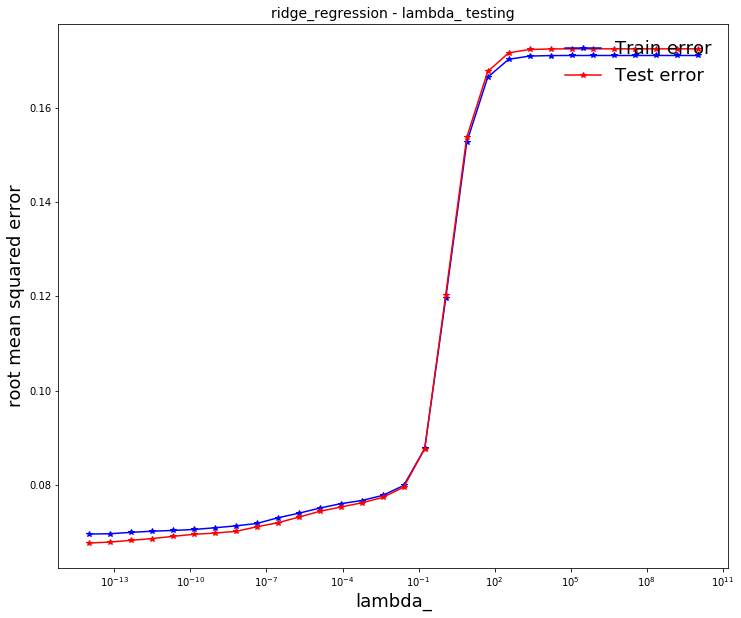

In [23]:
# seed for splitting
seed = 12
# seed for splitting
split_ratio = ratio_for_splitting
# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-14, 10, 30)
# params for ridge_regression
params = {
    'lambda_': 0
}

plot_lib.hyperparameter_testing(Y_train, X_train, split_ratio, seed, lambdarange, "ridge_regression", params, "lambda_")


## Logistic regression using gradient descent or SGD
### > hyperparameter gamma testing

iter 0 loss 0.6931466864117359
Train accuracy 0.6742419753086419
Valid accuracy 0.6754
iter 0 loss 0.6931413709888874
Train accuracy 0.6832888888888888
Valid accuracy 0.67516
1 proportion=0.9, gamma=0.000, Training RMSE=0.69314, Testing RMSE=0.69314
iter 0 loss 0.6931356694439902
Train accuracy 0.672962962962963
Valid accuracy 0.6734
iter 0 loss 0.693120709295081
Train accuracy 0.6830222222222222
Valid accuracy 0.67416
2 proportion=0.9, gamma=0.000, Training RMSE=0.69312, Testing RMSE=0.69311
iter 0 loss 0.6931061258556347
Train accuracy 0.672879012345679
Valid accuracy 0.6732
iter 0 loss 0.6930653196262789
Train accuracy 0.6828444444444445
Valid accuracy 0.67428
3 proportion=0.9, gamma=0.000, Training RMSE=0.69307, Testing RMSE=0.69303
iter 0 loss 0.6930269526837692
Train accuracy 0.6728839506172839
Valid accuracy 0.6732
iter 0 loss 0.6929170088099244
Train accuracy 0.6827111111111112
Valid accuracy 0.6742
4 proportion=0.9, gamma=0.000, Training RMSE=0.69294, Testing RMSE=0.69282
iter

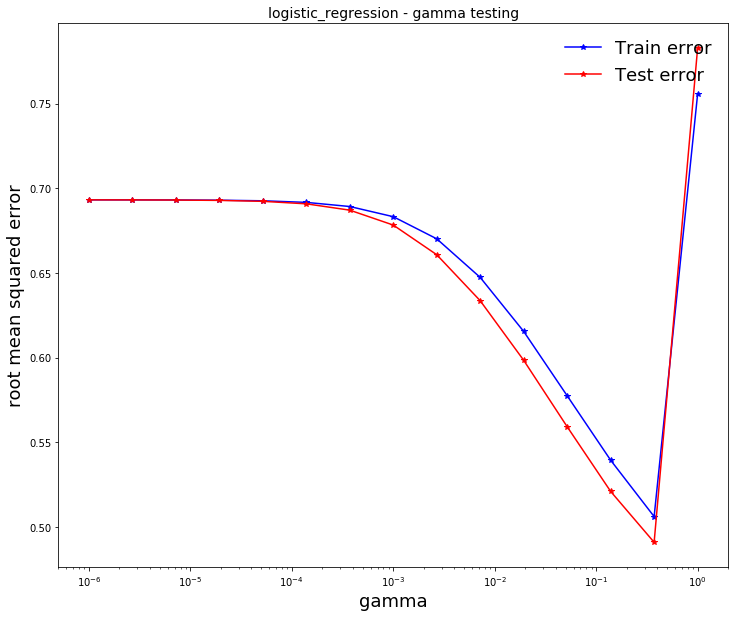

In [24]:
# Gamma testing
gamma_range_reglog_gamma = np.logspace(-6, 0, 15)
# iterations per gamma
iteration_log = 10
# params for logistic_regression
params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_log ,
    'gamma': 0.01 ,
}

plot_lib.hyperparameter_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_gamma, "logistic_regression", params, "gamma")


## Regularized logistic regression using gradient descent or SGD
### > hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.69310, Testing RMSE=0.69305
2 proportion=0.9, gamma=0.000, Training RMSE=0.69296, Testing RMSE=0.69286
3 proportion=0.9, gamma=0.000, Training RMSE=0.69270, Testing RMSE=0.69253
4 proportion=0.9, gamma=0.000, Training RMSE=0.69223, Testing RMSE=0.69192
5 proportion=0.9, gamma=0.000, Training RMSE=0.69138, Testing RMSE=0.69083
6 proportion=0.9, gamma=0.000, Training RMSE=0.68985, Testing RMSE=0.68889
7 proportion=0.9, gamma=0.000, Training RMSE=0.68718, Testing RMSE=0.68551
8 proportion=0.9, gamma=0.001, Training RMSE=0.68262, Testing RMSE=0.67988
9 proportion=0.9, gamma=0.001, Training RMSE=0.67527, Testing RMSE=0.67109
10 proportion=0.9, gamma=0.002, Training RMSE=0.66433, Testing RMSE=0.65855
11 proportion=0.9, gamma=0.004, Training RMSE=0.64958, Testing RMSE=0.64241
12 proportion=0.9, gamma=0.008, Training RMSE=0.63135, Testing RMSE=0.62307
13 proportion=0.9, gamma=0.014, Training RMSE=0.61001, Testing RMSE=0.60095
14 proportion=0.9, ga

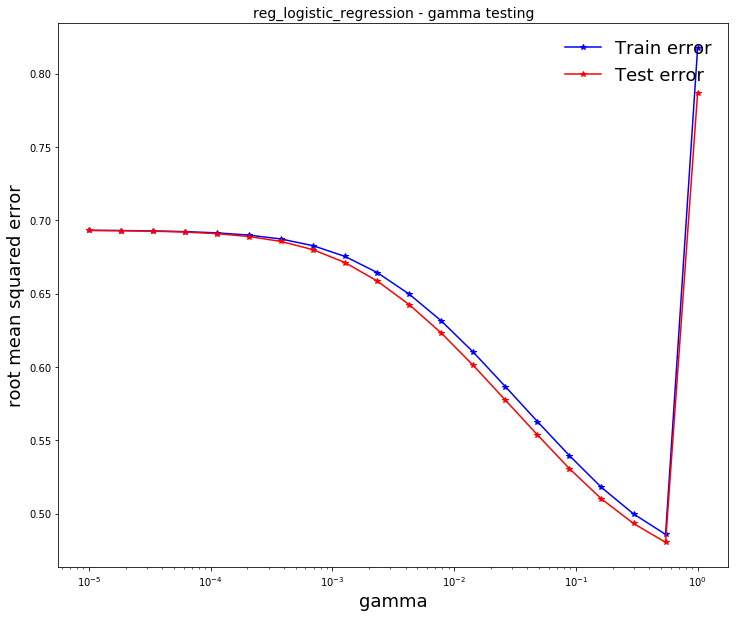

In [25]:
# Gamma testing
gamma_range_reglog_gamma = np.logspace(-5, 0, 20)
# lambda
lambda_ = 0.0005
# iterations per gamma
iteration_reglog = 10
# params for reg_logistic_regression
params = {
    'lambda_': lambda_,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': 0.01 ,
}

plot_lib.hyperparameter_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_gamma, "reg_logistic_regression", params, "gamma")


### > hyperparameter lambda testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.65866, Testing RMSE=0.64070
2 proportion=0.9, gamma=0.000, Training RMSE=0.62717, Testing RMSE=0.61760
3 proportion=0.9, gamma=0.000, Training RMSE=0.60900, Testing RMSE=0.60233
4 proportion=0.9, gamma=0.000, Training RMSE=0.59620, Testing RMSE=0.59104
5 proportion=0.9, gamma=0.000, Training RMSE=0.58644, Testing RMSE=0.58218
6 proportion=0.9, gamma=0.001, Training RMSE=0.57861, Testing RMSE=0.57494
7 proportion=0.9, gamma=0.003, Training RMSE=0.57211, Testing RMSE=0.56884
8 proportion=0.9, gamma=0.011, Training RMSE=0.56657, Testing RMSE=0.56359
9 proportion=0.9, gamma=0.043, Training RMSE=0.56174, Testing RMSE=0.55898
10 proportion=0.9, gamma=0.162, Training RMSE=0.55746, Testing RMSE=0.55487
11 proportion=0.9, gamma=0.616, Training RMSE=0.55364, Testing RMSE=0.55119
12 proportion=0.9, gamma=2.336, Training RMSE=0.55018, Testing RMSE=0.54786
13 proportion=0.9, gamma=8.859, Training RMSE=0.54703, Testing RMSE=0.54484
14 proportion=0.9, ga

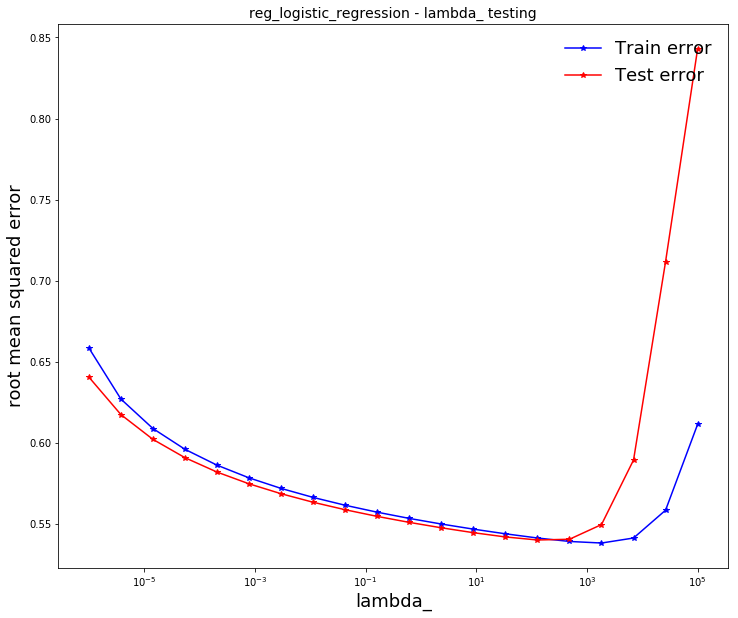

In [26]:
# Lambda testing
gamma_range_reglog_lambda = np.logspace(-6, 5, 20)
# params for reg_logistic_regression
gamma = 0.01
params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': gamma ,
}

plot_lib.hyperparameter_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_lambda, "reg_logistic_regression", params, "lambda_")


# The model we have chosen
## Regularized logistic regression
Why?

In [38]:
model = "reg_logistic_regression"
params = {
    'lambda_': 0.003,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': 500,
    'gamma': 0.01,
}
training = implementations.Training(model, params)

## Training
#### Description
Calculating the weights (using logistic gradient) and the logistic loss (using the weighted parameters)
Those two variables get stored in the object.

In [39]:
training.fit(X_train, Y_train)

(array([ 1.54710542e-01, -3.01278404e-01,  1.07765690e-02,  8.09700382e-02,
         6.85968246e-03,  3.48474149e-02, -4.08994237e-02,  1.21331600e-01,
        -2.79973776e-02,  4.87414120e-02, -1.52914208e-01,  9.56704674e-02,
         2.23595946e-02,  1.94266708e-01, -4.61337036e-03,  1.47253881e-02,
        -4.74007398e-03,  4.35810509e-03,  2.23952257e-02, -2.13134270e-02,
         3.07109810e-02, -2.70834717e-03, -1.29316439e-03, -6.11745295e-03,
         1.76991776e-03, -2.94054732e-03,  9.80298430e-03, -3.35314419e-02,
        -1.19266619e-01, -7.32386019e-02,  5.29629451e-02,  3.34779998e-02,
         4.81671788e-02,  3.96634129e-02,  7.52074685e-02,  2.31524759e-03,
         9.12472206e-03, -4.54335673e-02,  5.44865956e-02,  2.85638251e-02,
         5.11466402e-02, -3.16754008e-03,  2.03058308e-02,  1.74939581e-02,
        -4.32030001e-04, -1.17304059e-02, -2.43638467e-02,  7.00698256e-03,
         8.16989803e-02, -5.70466208e-03, -1.12391987e-02,  2.02016929e-02,
        -9.3

## Accuracy
#### Description

In [40]:
tr_acc, tr_loss = training.eval(X_train, Y_train)
valid_acc, valid_loss = training.eval(X_validation, Y_validation)
print("Train loss: {} Train accuracy: {}".format(tr_loss, tr_acc))
print("Validation loss: {} Validation accuracy: {}".format(valid_loss, valid_acc))

Train loss: 0.5215203125210166 Train accuracy: 0.7412044444444444
Validation loss: 0.5200850013741568 Validation accuracy: 0.74096


## Prediction - Building the results
#### Description

In [45]:
# build results
Y_test = training.predict(X_test)
Y_test = binary_to_positive_negative(Y_test)

# create submission .csv file of results Y_test
prediction_fn = model+"_predictions.csv"
dataset.create_csv_submission(indexes, Y_test, prediction_fn)
print("Predictions exported to file: ", prediction_fn)

Predictions exported to file:  reg_logistic_regression_predictions.csv
